In [2]:
# Importations nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importation des modèles de classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Importation des outils d'évaluation
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Définition des chemins de fichiers (à adapter si nécessaire)
files = {
    'train': 'datatraining.txt',
    'test1': 'datatest.txt',
    'test2': 'datatest2.txt'
}

def load_and_prepare_df(file_path):
    """Charge et prépare un fichier de données."""
    try:
        df = pd.read_csv(file_path, sep=",")
        df['date'] = pd.to_datetime(df['date'])
        df = df.set_index('date')
        if 'Unnamed: 0' in df.columns:
            df = df.drop('Unnamed: 0', axis=1)
        return df
    except FileNotFoundError:
        print(f"❌ ERREUR: Le fichier '{file_path}' n'a pas été trouvé. Veuillez vérifier le chemin.")
        raise

# Chargement et combinaison des datasets
df_train = load_and_prepare_df(files['train'])
df_test1 = load_and_prepare_df(files['test1'])
df_test2 = load_and_prepare_df(files['test2'])
df_test = pd.concat([df_test1, df_test2])

# Définition des Features (X) et Cible (y)
features = ['Temperature', 'Humidity', 'CO2', 'Light', 'HumidityRatio'] 
X_train = df_train[features]
y_train = df_train['Occupancy']
X_test = df_test[features]
y_test = df_test['Occupancy']

print("✅ Données chargées et prêtes pour l'entraînement.")

✅ Données chargées et prêtes pour l'entraînement.


In [4]:
# Dictionnaire des modèles à tester
classifiers = {
    'Logistic Regression (LR)': LogisticRegression(random_state=42, solver='liblinear'),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(n_neighbors=5),
    'Random Forest (RF)': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting (GBC)': GradientBoostingClassifier(random_state=42, n_estimators=100)
}

# DataFrame pour stocker les résultats
results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1-Score'])

print("\n--- Début de l'entraînement et de l'évaluation ---")

for name, model in classifiers.items():
    print(f"\n⏳ Entraînement de {name}...")
    
    # 1. Entraînement
    model.fit(X_train, y_train)
    
    # 2. Prédiction sur le jeu de test
    y_pred = model.predict(X_test)
    
    # 3. Évaluation des métriques
    accuracy = accuracy_score(y_test, y_pred)
    # Le F1-Score est important, surtout si l'imbalance est un problème
    f1 = f1_score(y_test, y_pred, average='weighted') 
    
    # 4. Stockage des résultats
    results.loc[len(results)] = [name, accuracy, f1]
    
    print(f"✅ {name} terminé. Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")


--- Début de l'entraînement et de l'évaluation ---

⏳ Entraînement de Logistic Regression (LR)...
✅ Logistic Regression (LR) terminé. Accuracy: 0.9898, F1-Score: 0.9898

⏳ Entraînement de K-Nearest Neighbors (KNN)...
✅ K-Nearest Neighbors (KNN) terminé. Accuracy: 0.9580, F1-Score: 0.9584

⏳ Entraînement de Random Forest (RF)...
✅ Random Forest (RF) terminé. Accuracy: 0.9691, F1-Score: 0.9693

⏳ Entraînement de Gradient Boosting (GBC)...
✅ Gradient Boosting (GBC) terminé. Accuracy: 0.9481, F1-Score: 0.9467



--- Tableau Récapitulatif des Performances ---
| Model                     |   Accuracy |   F1-Score |
|:--------------------------|-----------:|-----------:|
| Logistic Regression (LR)  |     0.9898 |     0.9898 |
| Random Forest (RF)        |     0.9691 |     0.9693 |
| K-Nearest Neighbors (KNN) |     0.9580 |     0.9584 |
| Gradient Boosting (GBC)   |     0.9481 |     0.9467 |


C:\Users\21626\AppData\Local\Temp\ipykernel_9704\845296189.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1-Score', data=results_sorted, palette='viridis')


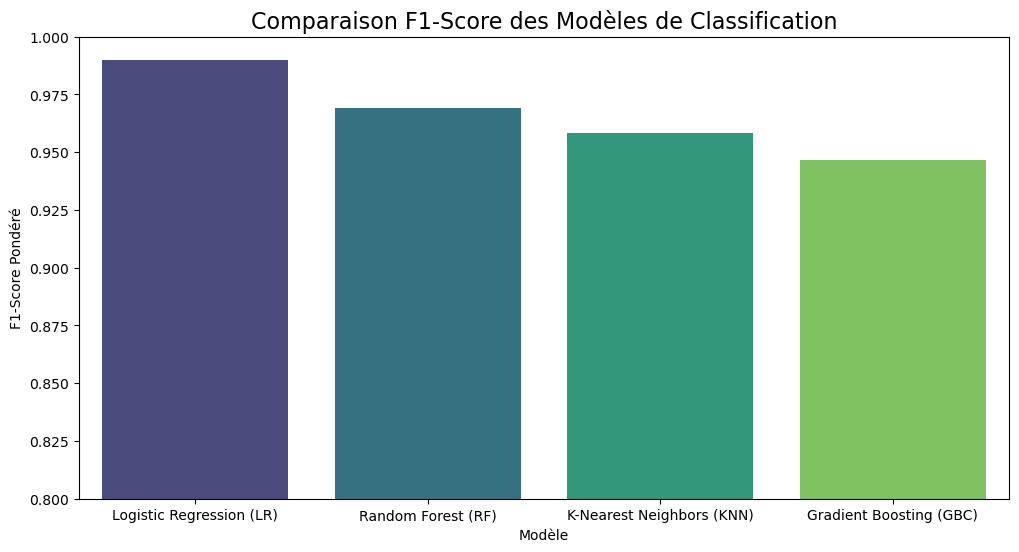


Le meilleur modèle est : Logistic Regression (LR)

Rapport de Classification détaillé pour Logistic Regression (LR) :

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9396
           1       0.96      1.00      0.98      3021

    accuracy                           0.99     12417
   macro avg       0.98      0.99      0.99     12417
weighted avg       0.99      0.99      0.99     12417


✅ Le meilleur modèle (Logistic Regression (LR)) est sauvegardé pour le déploiement.


In [6]:
print("\n--- Tableau Récapitulatif des Performances ---")
# Trier par F1-Score car il est plus représentatif que l'Accuracy pour la classification
results_sorted = results.sort_values(by='F1-Score', ascending=False)
print(results_sorted.to_markdown(index=False, floatfmt=".4f"))

# Visualisation des performances
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='F1-Score', data=results_sorted, palette='viridis')
plt.title('Comparaison F1-Score des Modèles de Classification', fontsize=16)
plt.ylim(0.8, 1.0) # Zoom sur la performance élevée
plt.ylabel('F1-Score Pondéré')
plt.xlabel('Modèle')
plt.show()

# ---------------------------------------------------------------------
# Sélection et Examen du Meilleur Modèle
# ---------------------------------------------------------------------

best_model_name = results_sorted.iloc[0]['Model']
best_model = classifiers[best_model_name]
print(f"\nLe meilleur modèle est : {best_model_name}")

# Afficher le rapport détaillé pour le meilleur modèle
y_best_pred = best_model.predict(X_test)
print(f"\nRapport de Classification détaillé pour {best_model_name} :\n")
print(classification_report(y_test, y_best_pred))

# Sauvegarde du meilleur modèle
import joblib
joblib.dump(best_model, f'air_aware_best_occupancy_model.pkl')
print(f"\n✅ Le meilleur modèle ({best_model_name}) est sauvegardé pour le déploiement.")